In [93]:
import pandas as pd
import matplotlib.pyplot as plt

In [94]:
attributes_1 = pd.read_csv("_Spambee_Attributes__2022-04.csv")
attributes_2 = pd.read_csv("_Spambee_Attributes__2022-05.csv")
events_1 = pd.read_csv("_Spambee_Events__2022-04.csv")
events_2 = pd.read_csv("_Spambee_Events__2022-05.csv")
print(attributes_1.shape)
print(attributes_2.shape)
print(events_1.shape)
print(events_2.shape)


(220418, 5)
(237924, 5)
(19698, 5)
(19625, 5)


In [95]:
attributes_1.shape

(220418, 5)

In [96]:
attributes_1.head()


,index,id,event_id,object_relation,value
0,237925,24343875,287976,host,x247.de
1,237926,24343882,287976,host,ehst.sv
2,237927,24366311,288271,host,s.yimg.com
3,237928,24377781,288308,host,kwargs.id
4,237929,24395185,288499,host,imgbb.com


In [97]:
attributes_1.tail()

,index,id,event_id,object_relation,value
220413,330467,25059734,295947,host,news.la-chasseauxdeals.fr
220414,330468,25059742,295947,host,news.la-chasseauxdeals.fr
220415,330469,25059750,295947,host,news.la-chasseauxdeals.fr
220416,330470,25059758,295947,host,news.la-chasseauxdeals.fr
220417,330471,25059766,295947,host,news.la-chasseauxdeals.fr


In [98]:
attributes_2.head()

,index,id,event_id,object_relation,value
0,0,27623361,324128,host,s.yimg.com
1,1,27628816,324192,host,r.style
2,2,27628823,324192,host,r.name
3,3,27630538,324195,host,o.style
4,4,27630545,324195,host,o.name


In [99]:
events_1.head()

,index,id,date,attribute_count,Tag
0,19625,287833,2022-04-01,28,None
1,19626,287834,2022-04-01,79,None
2,19627,287835,2022-04-01,89,Phishing
3,19628,287836,2022-04-01,159,Phishing
4,19629,287837,2022-04-01,62,None


In [100]:
events_2.head()

,index,id,date,attribute_count,Tag
0,0,307749,2022-05-01,36,Phishing
1,1,307750,2022-05-01,126,None
2,2,307751,2022-05-01,20,None
3,3,307752,2022-05-01,18,None
4,4,307753,2022-05-01,55,None


In [101]:
round(events_2.isnull().sum()*100/events_2.shape[0],2).sort_values(ascending=False).head(20)
#il n'y a pas de valeur nulle dans aucun des datasets

index              0.0
id                 0.0
date               0.0
attribute_count    0.0
Tag                0.0
dtype: float64

<AxesSubplot:>

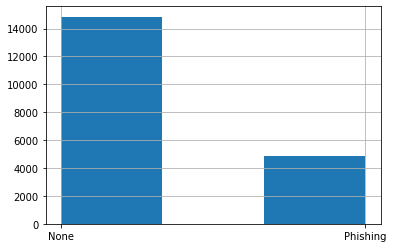

In [102]:
events_1["Tag"].hist(bins=3)

<AxesSubplot:>

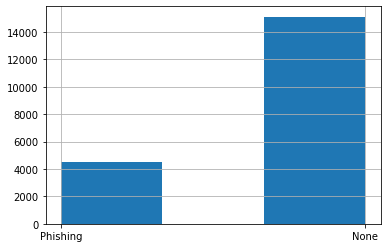

In [103]:
events_2["Tag"].hist(bins=3)

In [104]:
attributes_1["object_relation"].unique()


array(['host', 'feedback_time', 'from', 'header'], dtype=object)

AttributeError: 'Rectangle' object has no property 'bin'

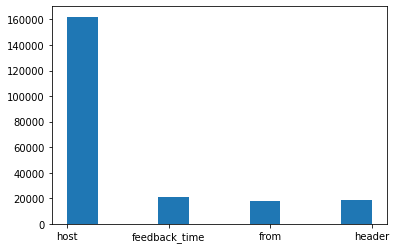

In [105]:
attributes_1["object_relation"].hist(bin=3)

In [107]:
#replace None by 0 and phishing by 1
events_1.loc[events_1["Tag"] == "None", "Tag"] = 0
events_1.loc[events_1["Tag"] == "Phishing", "Tag"] = 1
events_1.head()


,index,id,date,attribute_count,Tag
0,19625,287833,2022-04-01,28,0
1,19626,287834,2022-04-01,79,0
2,19627,287835,2022-04-01,89,1
3,19628,287836,2022-04-01,159,1
4,19629,287837,2022-04-01,62,0


In [108]:
none_attribute_count = events_1.loc[events_1["Tag"] == 0, "attribute_count"]
none_attribute_count.sum()/len(none_attribute_count)


81.80828561805322

In [109]:
none_attribute_count = events_1.loc[events_1["Tag"] == 1, "attribute_count"]
none_attribute_count.sum()/len(none_attribute_count)


103.58932618998557

In [110]:
events_1["attribute_count"].sum()/len(events_1["attribute_count"])

87.17448471926083

In [111]:
none_attribute_count = events_1.loc[events_1["Tag"] == 0, "attribute_count"]
none_attribute_count.median(axis=0)

40.0

In [112]:
none_attribute_count = events_1.loc[events_1["Tag"] == 1, "attribute_count"]
none_attribute_count.median(axis=0)

50.0

In [113]:
attributes_1 = attributes_1[attributes_1["object_relation"] == "header"]
attributes_1.shape

(18961, 5)

In [118]:
merged_dataset = pd.merge(events_1, attributes_1, left_on="id", right_on="event_id")
merged_dataset = merged_dataset.drop(["id_x", "index_x", "date", "id_y", "index_y", "object_relation", "attribute_count"], axis=1)

merged_dataset.head()

,Tag,event_id,value
0,0,287833,Delivered-To: UNDISCLOSEDFORPRIVACY@PRIVACYDOM...
1,0,287833,Delivered-To: UNDISCLOSEDFORPRIVACY@PRIVACYDOM...
2,0,287834,Delivered-To: UNDISCLOSEDFORPRIVACY@PRIVACYDOM...
3,0,287834,Delivered-To: UNDISCLOSEDFORPRIVACY@PRIVACYDOM...
4,1,287835,Received: from 10.194.205.88\r\n by atlas109.s...


In [120]:
merged_dataset.to_csv("headers.csv")